# Bank - Customer churn prediction

## 1. Introduction

One of the most important metrics for the growing of company's business is customer churn. Customer Churn refers to the decision of the person of stopping using the products/services of a company, in other words the loss of the client. 

So, it is very important to preserve a good relationship with the majority of the company's customer. The better the relationship, the financial results it will be very satisfactory.

As explained above, reduce the customer churn is very important on a business. If a company would like to have better financial results, they know to pay attention to this factor.

So, the main goal of this project is to build a machine learning model that predicts if a customer will stop using the company's products/services.

Variables explanation:
- CLIENTNUM - Client number. Unique identifier for the customer holding the account
- Attrition_Flag - Internal event (customer activity) variable - if the account is closed then 1 else 0
- Customer_Age - Customer's Age in Years
- Gender - M=Male, F=Female
- Dependent_count - Number of dependents
- Education_Level - Educational Qualification of the account holder (example: high school, college graduate, etc.)
- Marital_Status - Married, Single, Divorced, Unknown
- Income_Category - Annual Income Category of the account holder (< 40K, 40K - 60K, 60K - 80K, 80K-120K, > 120K, Unknown)
- Card_Category - Type of Card (Blue, Silver, Gold, Platinum)
- Months_on_book - Period of relationship with bank
- Total_Relationship_Count - Total no. of products held by the customer
- Months_Inactive_12_mon - No. of months inactive in the last 12 months
- Contacts_Count_12_mon - No. of Contacts in the last 12 months
- Credit_Limit - Credit Limit on the Credit Card
- Total_Revolving_Bal - Total Revolving Balance on the Credit Card
- Avg_Open_To_Buy - Open to Buy Credit Line (Average of last 12 months)
- Total_Amt_Chng_Q4_Q1 - Change in Transaction Amount (Q4 over Q1)
- Total_Trans_Amt - Total Transaction Amount (Last 12 months)
- Total_Trans_Ct - Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1 - Change in Transaction Count (Q4 over Q1)
- Avg_Utilization_Ratio - Average Card Utilization Ratio

## 2. Importing  libraries

After the definition and the having in mind the purpose of this project , the first thing to do is the import all the libraries that will help to achieve our goals, predicting churns.


In [1]:
# Standard data analysis and wrangling libraries
import numpy as np
import pandas as pd
from scipy.stats import zscore
from scipy.stats import boxcox

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Various ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.feature_selection import RFE

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Cross Validation
from sklearn.model_selection import cross_val_score

# Warning filter
import warnings
warnings.filterwarnings('ignore')


## 3. Importing the data

In the section it will be imported the dataset received from the company and it will be observed the content inside it.

In [2]:
#Loading the dataset
data = pd.read_csv('BankChurners.csv')
data

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  39  ...                       1                      3   
1                  44  ...                       1                      2   
2                  36  ...                       1                      0   
3                  34  ...                       4                      1   
4                  21  ...                       1                      0   
...               ...  ...                     ...                    ...   
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
3            3313.0                 2517            796.0   
4            4716.0                    0           4716.0   
...             ...                  ...              ...   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124  

In [3]:
#Dropping ID column
data = data.drop('CLIENTNUM', axis = 1)

As the ID of the clients is just to help the managment of the system database, it will be removed from the actual dataset because it doesn't have relevance to churn prediction

In [4]:
#Getting the columns name
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [5]:
#General information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## 4. Data Cleaning

It will be done the cleaning of the data, all the missing value problem will be solved and it will be analyzed all the data distribution

In [6]:
#Checking if the data contains missing values
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

As shown above, the dataset doesn't have missing values

In [7]:
#Checking if the data contains duplicated values
data.duplicated().sum()

0

In [9]:
#Analysing the data on each column
for a in data.columns:
    print(data[a].value_counts().sort_values(ascending=False))
    print()


Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
60    127
33    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
68      2
66      2
73      1
70      1
Name: Customer_Age, dtype: int64

F    5358
M    4769
Name: Gender, dtype: int64

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dt

The data seems to have reliable information

## 5. EDA (Exploratory Data Analysis)

In this section, it will be analized the relationship between the features and they impact the churn of the customers

In [16]:
#Setting the style of the plots
sns.set_style('darkgrid')

In [17]:
#Descritive statistics information
data.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [11]:
 #Getting the categorical attributes
categorical_attributes = data.select_dtypes(include=['object']).columns
categorical_attributes

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [12]:
#Analysing the different features inside the categorial attributes
for col_name in data.columns:
    if data[col_name].dtypes == 'object':
        unique_cat = len(data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'Attrition_Flag' has 2 unique categories
Feature 'Gender' has 2 unique categories
Feature 'Education_Level' has 7 unique categories
Feature 'Marital_Status' has 4 unique categories
Feature 'Income_Category' has 6 unique categories
Feature 'Card_Category' has 4 unique categories


In [13]:
#Getting the numerical attributes
numerical_attributes = list(data.select_dtypes(include=['float64', 'int64']).columns)
numerical_attributes

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

<Figure size 1440x1080 with 0 Axes>

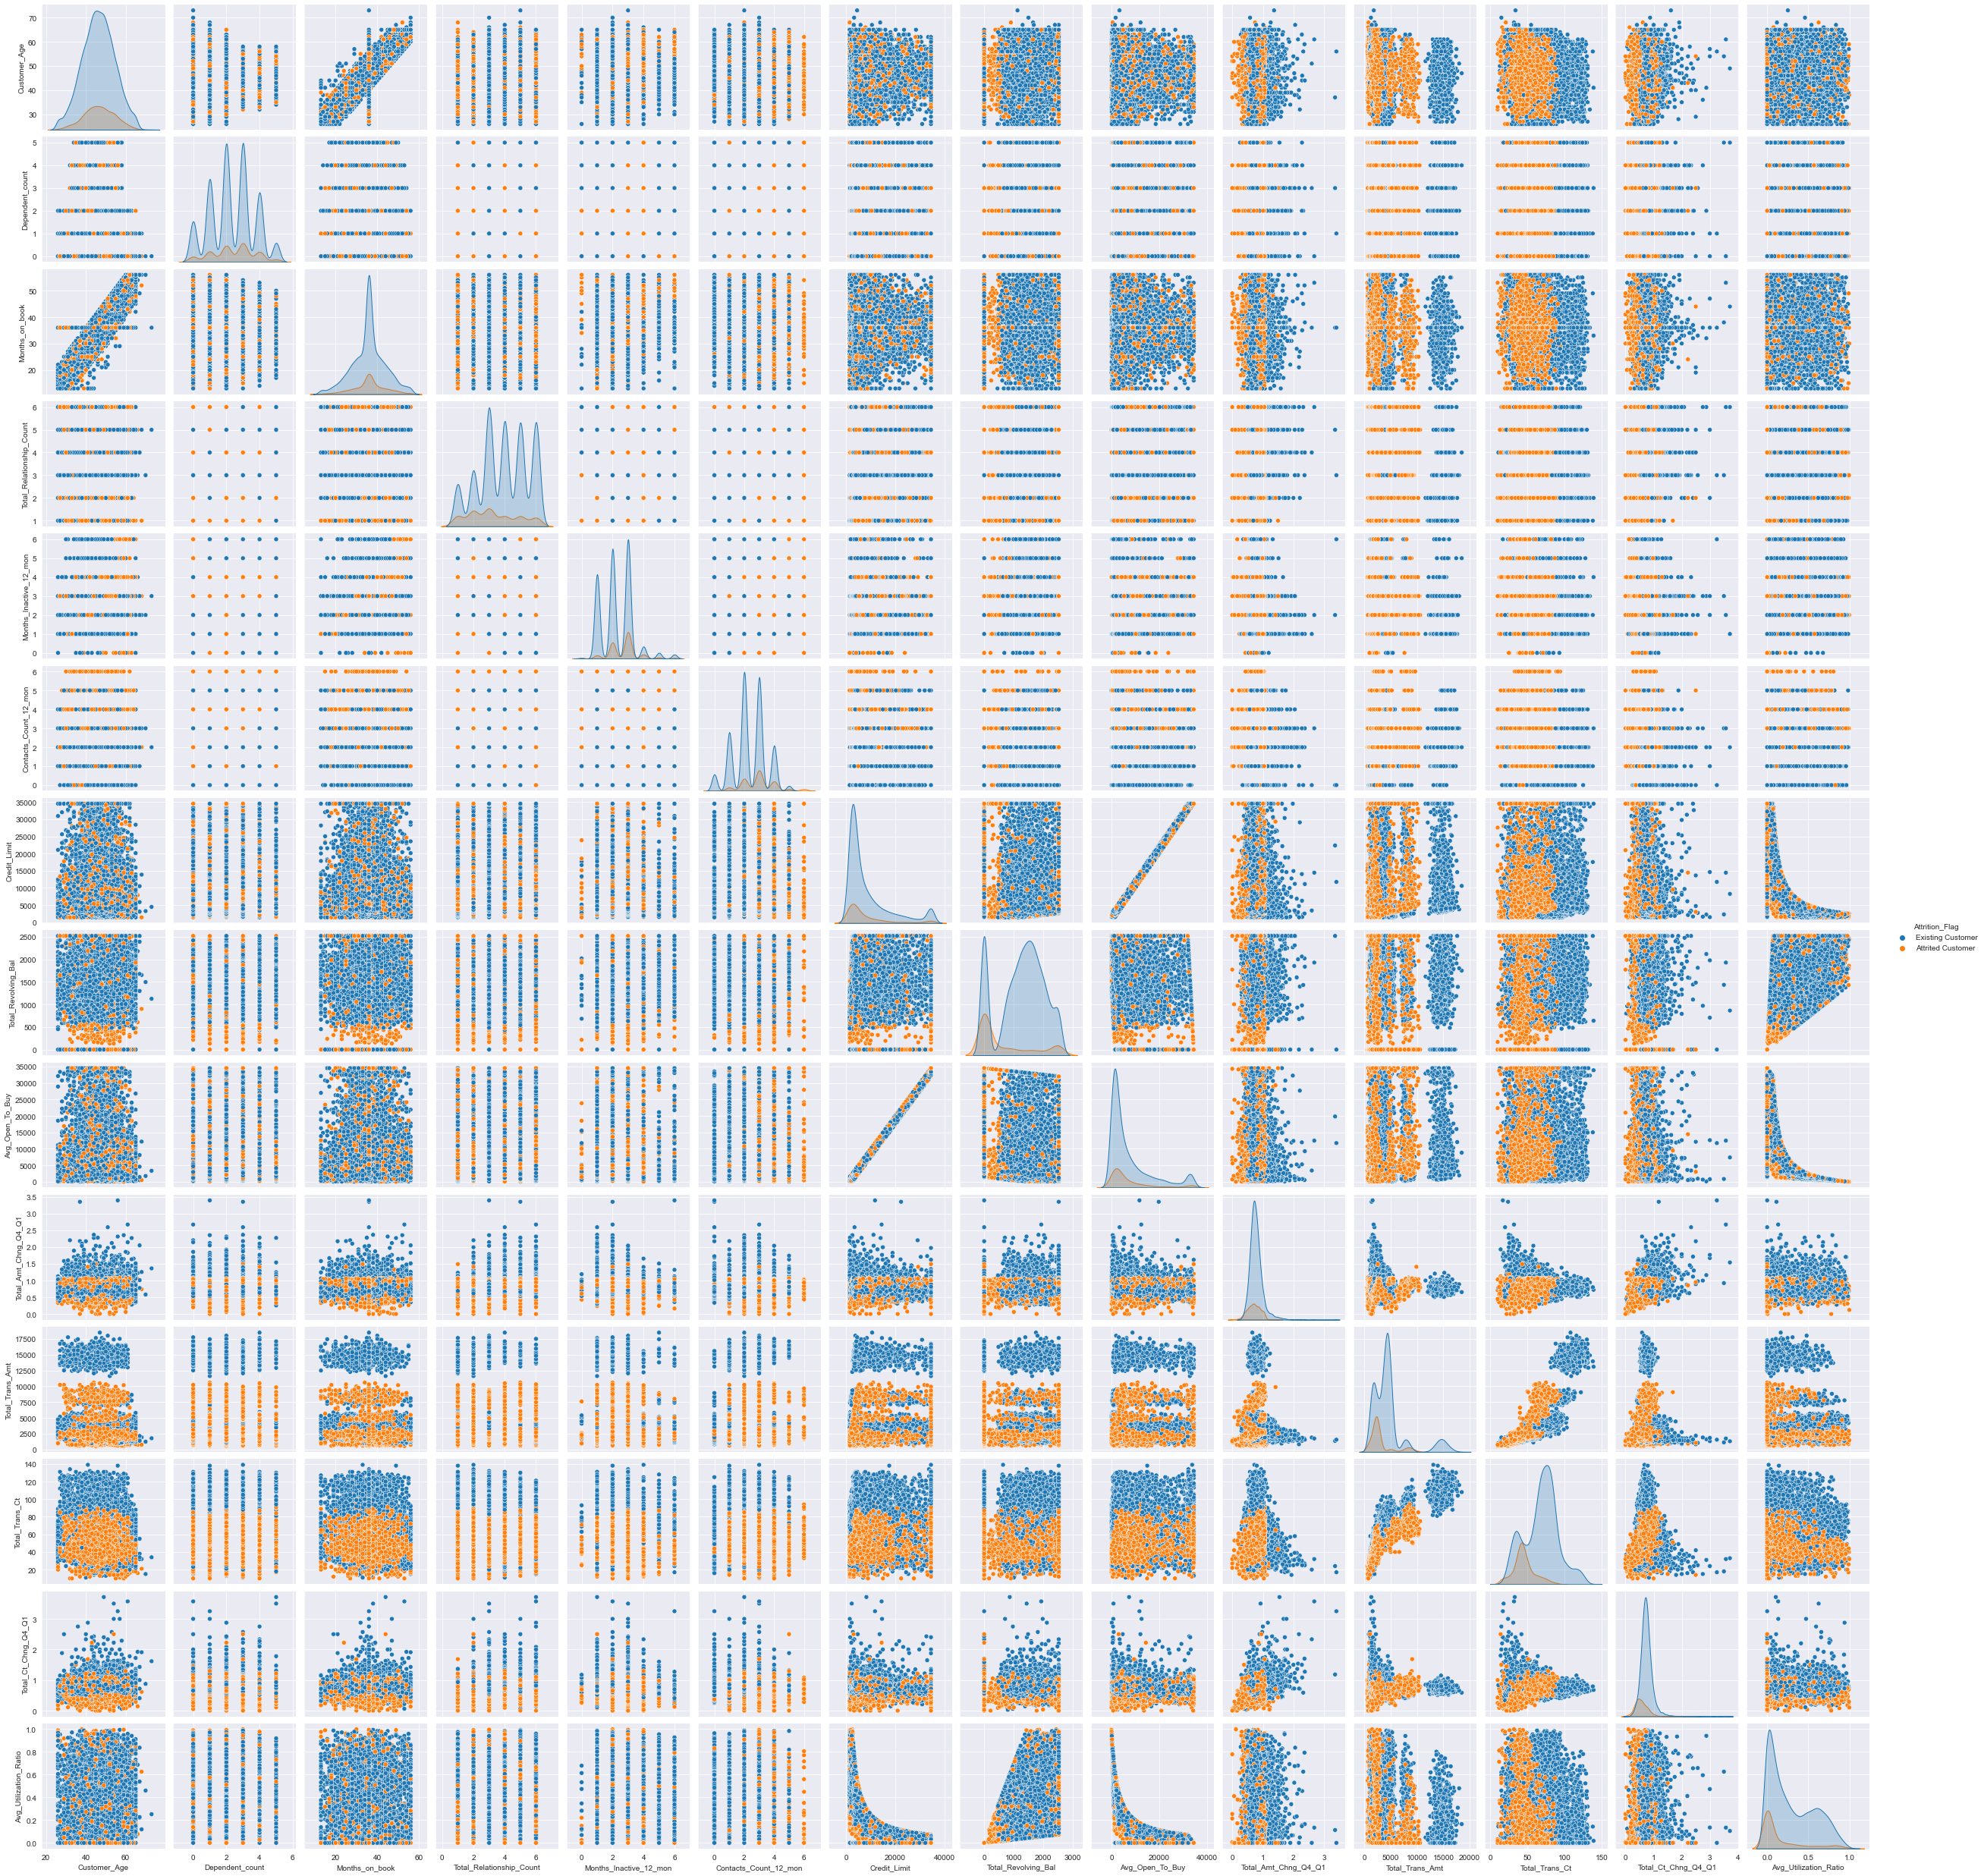

In [18]:
plt.figure(figsize=(20,15))
ax = sns.pairplot(data,hue = 'Attrition_Flag')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


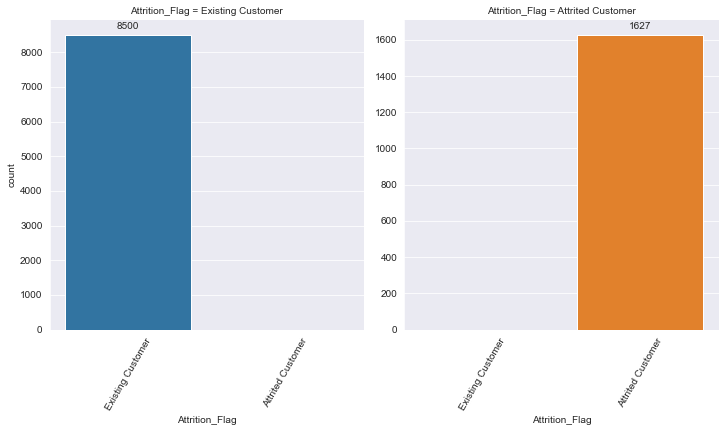

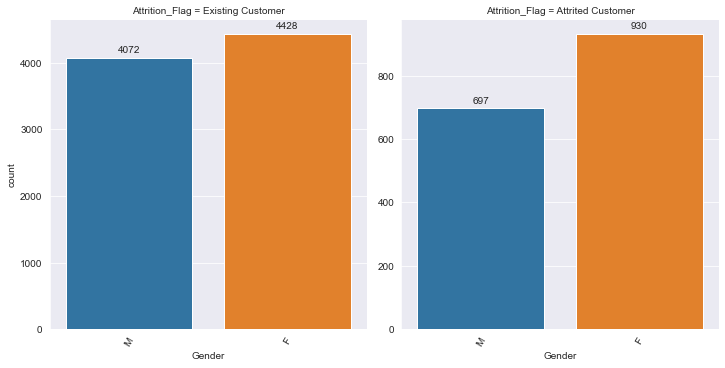

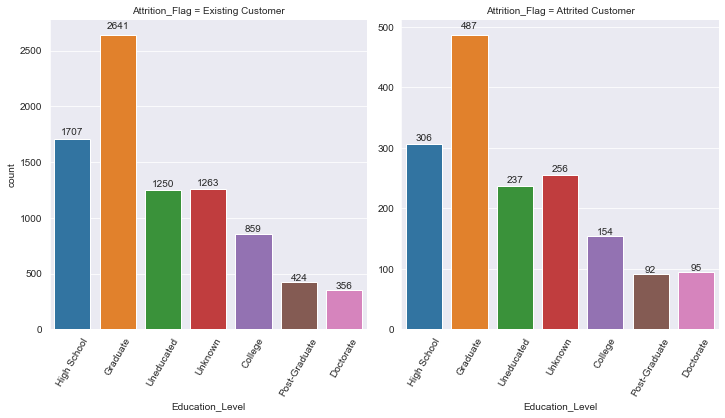

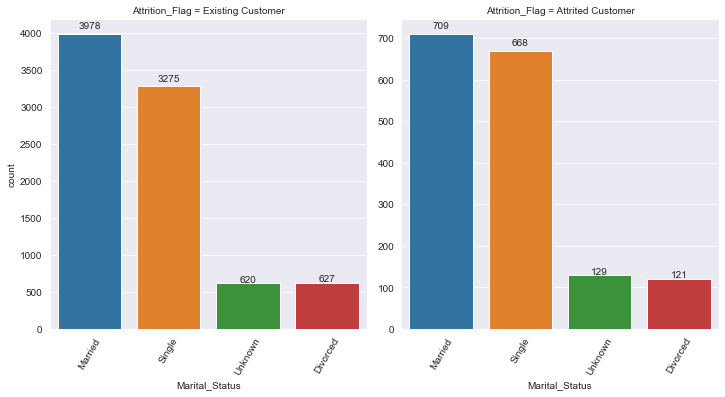

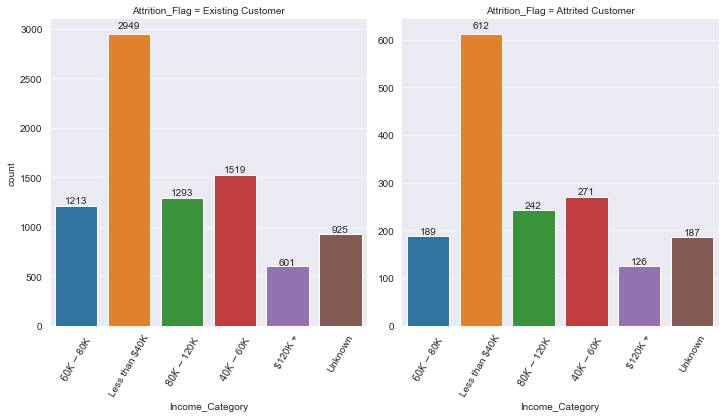

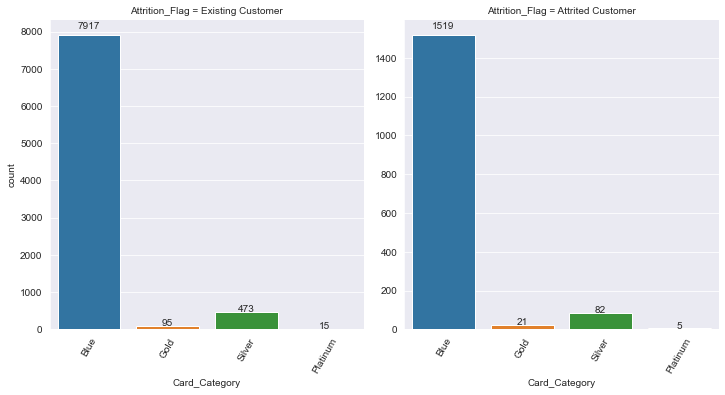

In [19]:
#Relationship between the numerical attributes
for col in categorical_attributes:
    if data[col].nunique() <= 10:
        g = sns.catplot(x = col, kind='count', col = 'Attrition_Flag', data=data, sharey=False)
        g.set_xticklabels(rotation=60)
        for i in range(data['Attrition_Flag'].nunique()):
            ax = g.facet_axis(0,i)
            for p in ax.patches:
                height = p.get_height()
                ax.text(x = p.get_x()+(p.get_width()/2), y = height * 1.02 , s = '{:.0f}'.format(height), ha = 'center')

- The dataset is imbalanced, it has much more Existing Customer than Attrited Customer
- Gender: Pretty close values, doesn't seen to affect the churn rate
- Education Level: 30% of the churn customers are Graduated
- Marital Status: 84.6% of the churn customers are married or single
- Income Status: 37.6% of the churn customers earn less than $40k per year
- Card Category:  93.4% of the churn customers has Blue card

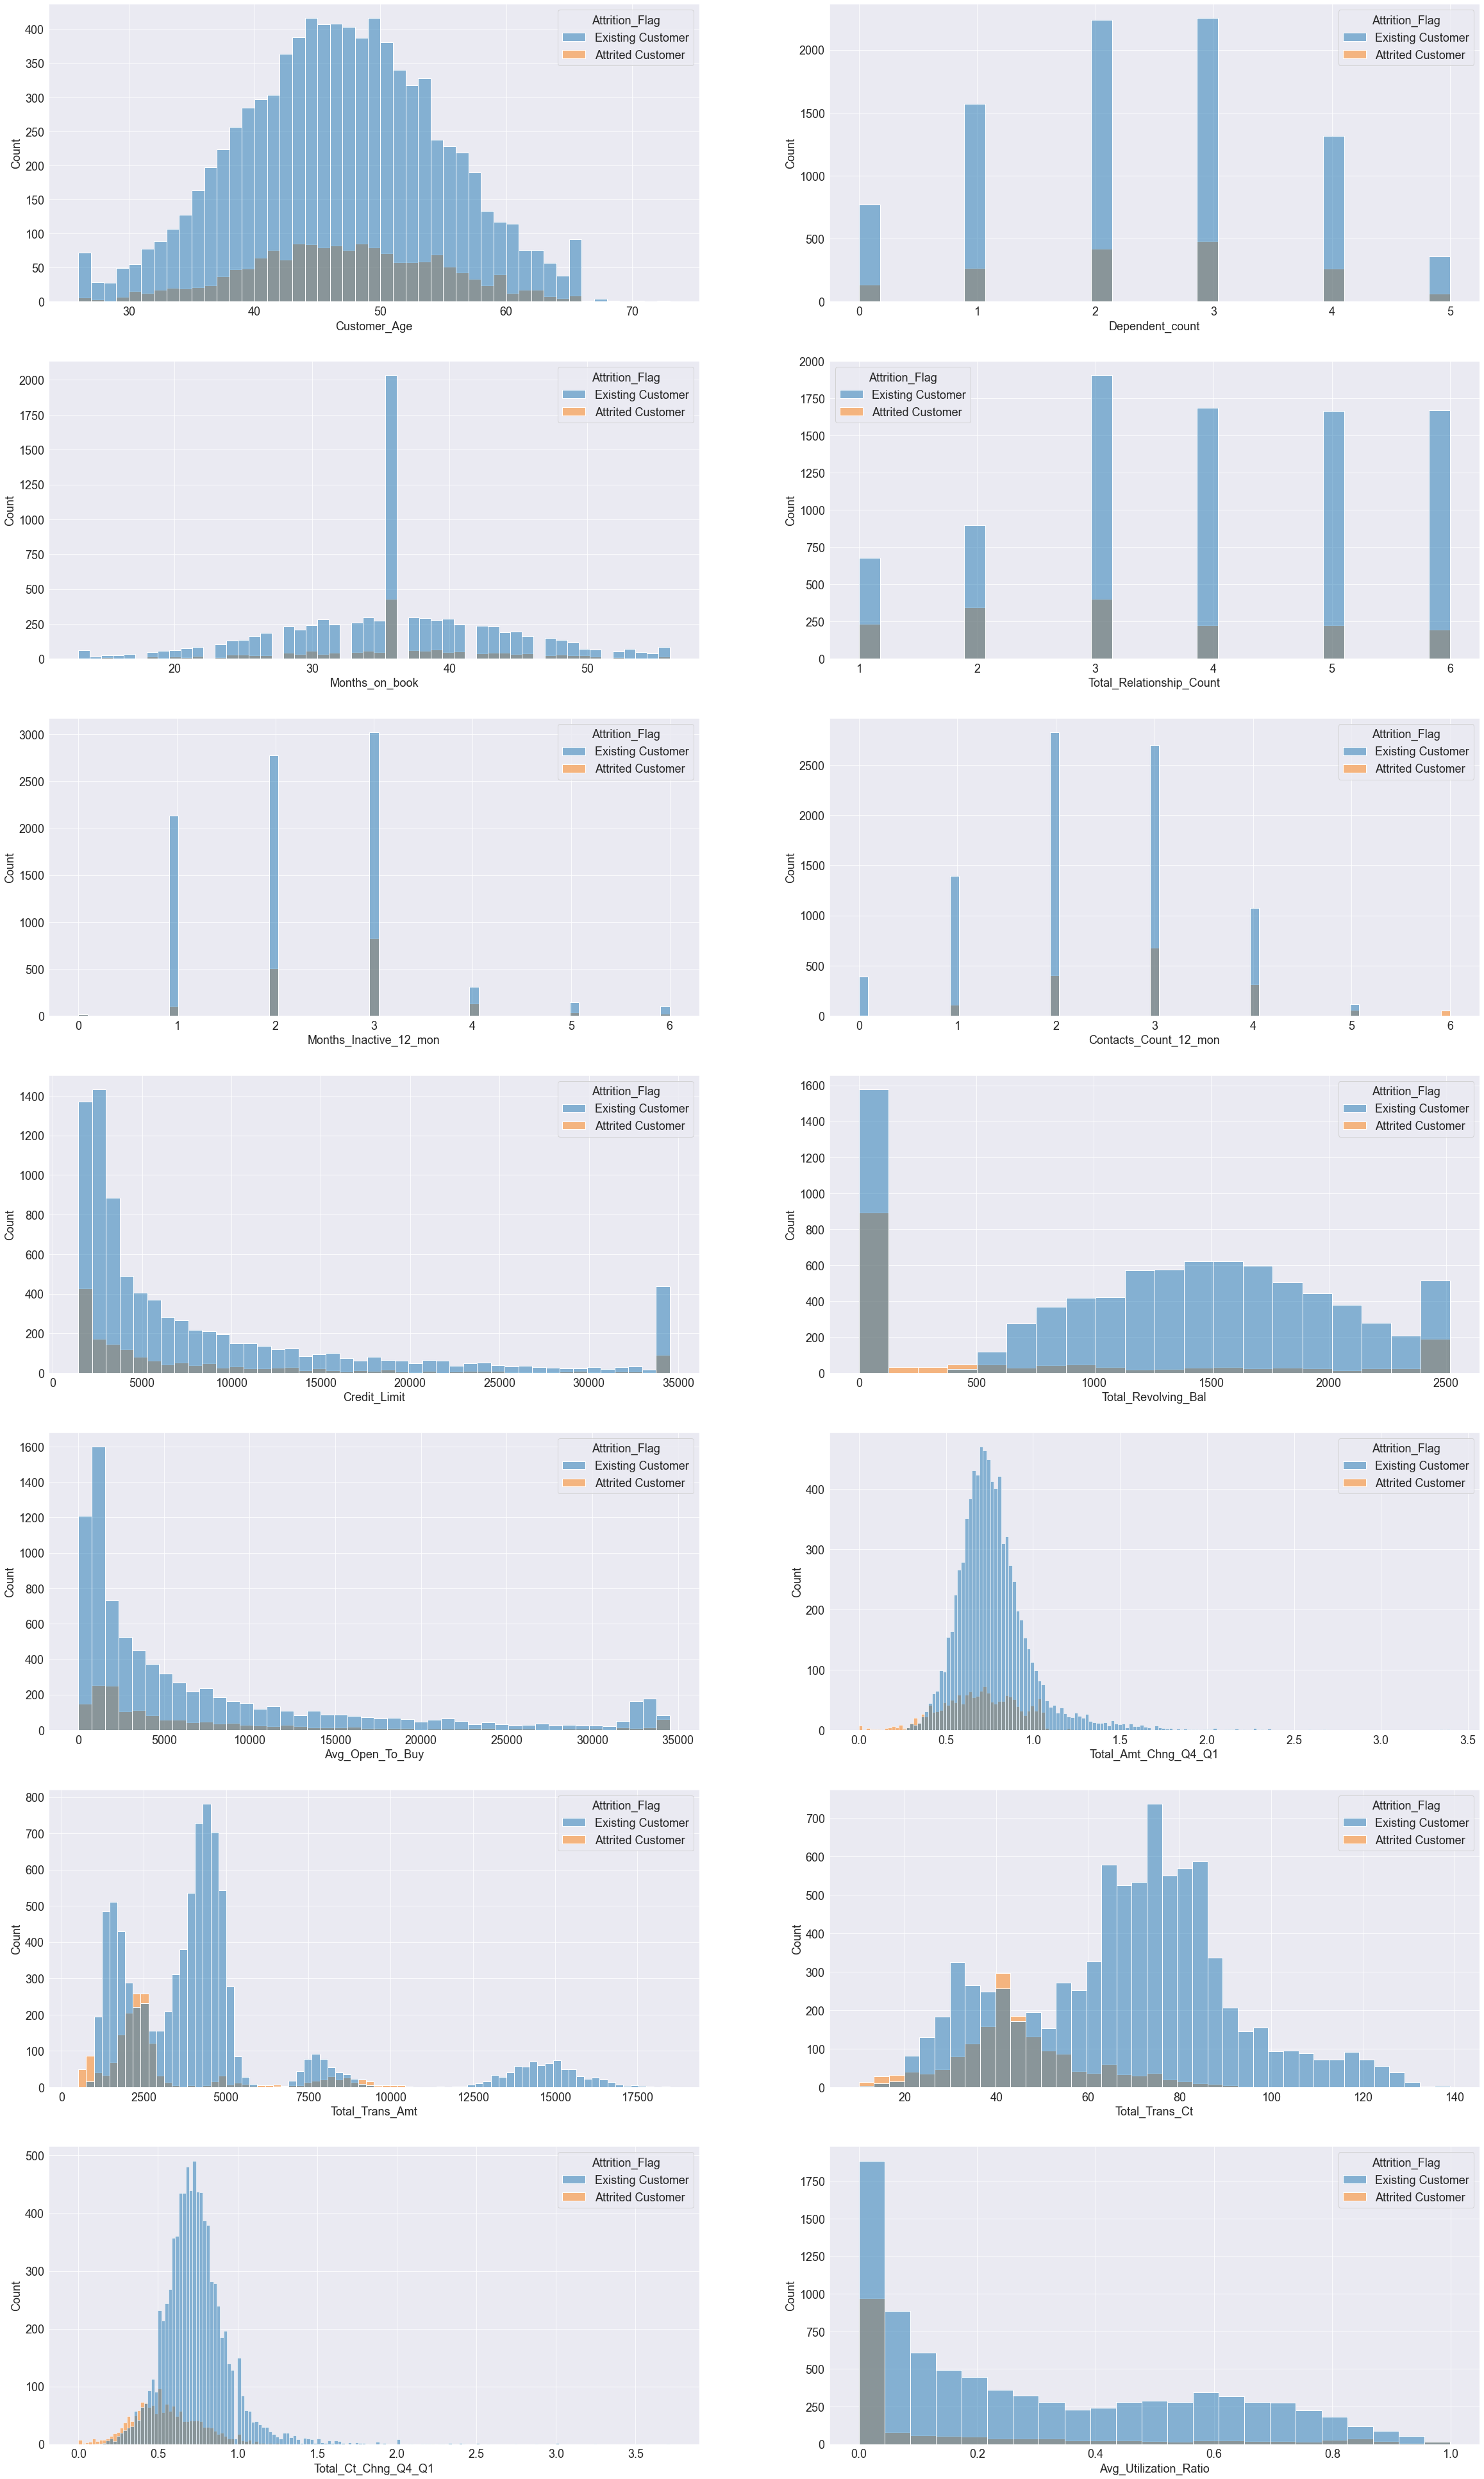

In [20]:
plt.figure(figsize=(40, 70))
plt.rcParams.update({'font.size': 18})
plt.subplot(7,2,1)
sns.histplot(data= data, x = numerical_attributes[0], hue ='Attrition_Flag')
plt.subplot(7,2,2)
sns.histplot(data= data, x = numerical_attributes[1], hue ='Attrition_Flag')
plt.subplot(7,2,3)
sns.histplot(data= data, x = numerical_attributes[2], hue ='Attrition_Flag')
plt.subplot(7,2,4)
sns.histplot(data= data, x = numerical_attributes[3], hue ='Attrition_Flag')
plt.subplot(7,2,5)
sns.histplot(data= data, x = numerical_attributes[4], hue ='Attrition_Flag')
plt.subplot(7,2,6)
sns.histplot(data= data, x = numerical_attributes[5], hue ='Attrition_Flag')
plt.subplot(7,2,7)
sns.histplot(data= data, x = numerical_attributes[6], hue ='Attrition_Flag')
plt.subplot(7,2,8)
sns.histplot(data= data, x = numerical_attributes[7], hue ='Attrition_Flag')
plt.subplot(7,2,9)
sns.histplot(data= data, x = numerical_attributes[8], hue ='Attrition_Flag')
plt.subplot(7,2,10)
sns.histplot(data= data, x = numerical_attributes[9], hue ='Attrition_Flag')
plt.subplot(7,2,11)
sns.histplot(data= data, x = numerical_attributes[10], hue ='Attrition_Flag')
plt.subplot(7,2,12)
sns.histplot(data= data, x = numerical_attributes[11], hue ='Attrition_Flag')
plt.subplot(7,2,13)
sns.histplot(data= data, x = numerical_attributes[12], hue ='Attrition_Flag')
plt.subplot(7,2,14)
sns.histplot(data= data, x = numerical_attributes[13], hue ='Attrition_Flag')
plt.show()

- Customer Age: People between 39 and 54 represents 68% of the churn customers.
- Dependent Count: 55.2% of the churn customers have 2 or 3 dependents.
- Months on book: 50% of the churn customers have between 31 and 41 months on book.
- Total relationship count: People with 2 or 3 total relationship count represents 45.7% of the churn customers.
- Months Inactive12 mon: People that have been inactive by 2 or 3 months represents 81.7% of the churn customers.
- Contacts Count_12 mon: People that have between 2 and 4 contacts in the last 12 months represents 86% of the churn customers.
- Credit Limit: People with credit limit lower than 5K have higher chance become a churn customer.
- Total Revolving bal: People with total revolving balance in credit card lower 125 have higher chance to become a churn customer.
- Avg Open To Buy: People opened to buy a credit line for less 5K have higher chance become a churn customer
- Total Amt Chng Q4 Q1: People between 0.55 and 0.84 total amount represents 50% of the churn customer.
- Total Trans Amt: Around 2400 have higher chances to become a churn customer. OBS: Normally, people that don't churn has total transaction around 4000.
- Total Trans Ct: People that do around 40 transactions per year have higher chances to become a churn customer. OBS: Normally, people that do not churn has around 72 transactions a year.
- Total_Ct_Chng_Q4_Q1: Around 0.5 have higher chance to churn. OBS: Normally people that do not churn have around 0.7.
- Avg Utilization Ratio: Around 0.3 have higher chance to churn.


## 6. Featuring Engineering

In this section the categorical features will be treated. Machine Learning models don't understand this type os varible, so they need to be transformed to numerical variable using some techniques to maintain their importance on the results of this project.


In [21]:
#Getting the unique value contained in each categorical column
for col in categorical_attributes:
    print(data[col].unique())

['Existing Customer' 'Attrited Customer']
['M' 'F']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']


In [22]:
#Encoding the dummy categorical data
data = pd.get_dummies(data, columns = ['Marital_Status','Card_Category'])

As the collumns "Marital_Status" and "Card_Category" don't have an ordinal relationship between its values, it can't be used an ordinal encondig. So to solve this problem, a dummy encoder was used.

In [23]:
#Encoding the categorical data
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer':0,'Attrited Customer':1})

data['Gender'] = data['Gender'].map({'F':0, 'M':1 })

ordinal_education = {'Unknown':0, 'Uneducated':0, 'High School':1,'College':2 , 'Graduate':3, 'Post-Graduate':4, 'Doctorate':5}
data['Education_Level'] = data['Education_Level'].map(ordinal_education)

ordinal_income = {'Unknown': 0, 'Less than $40K': 20000, '$40K - $60K': 50000, '$60K - $80K': 70000, '$80K - $120K':100000, '$120K +': 130000}
data['Income_Category'] = data['Income_Category'].map(ordinal_income)


data

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0                   0            45       1                3                1   
1                   0            49       0                5                3   
2                   0            51       1                3                3   
3                   0            40       0                4                1   
4                   0            40       1                3                0   
...               ...           ...     ...              ...              ...   
10122               0            50       1                2                3   
10123               1            41       1                2                0   
10124               1            44       0                1                1   
10125               1            30       1                2                3   
10126               1            43       0                2                3   

       Income_Category  Months_on_book  Total_Relationship_Count  \
0                70000              39                         5   
1                20000              44                         6   
2               100000              36                         4   
3                20000              34                         3   
4                70000              21                         5   
...                ...             ...                       ...   
10122            50000              40                         3   
10123            50000              25                         4   
10124            20000              36                         5   
10125            50000              36                         4   
10126            20000              25                         6   

       Months_Inactive_12_mon  Contacts_Count_12_mon  ...  \
0                           1                      3  ...   
1                           1                      2  ...   
2                           1                      0  ...   
3                           4                      1  ...   
4                           1                      0  ...   
...                       ...                    ...  ...   
10122                       2                      3  ...   
10123                       2                      3  ...   
10124                       3                      4  ...   
10125                       3                      3  ...   
10126                       2                      4  ...   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Marital_Status_Divorced  \
0                    1.625                  0.061                        0   
1                    3.714                  0.105                        0   
2                    2.333                  0.000                        0   
3                    2.333                  0.760                        0   
4                    2.500                  0.000                        0   
...                    ...                    ...                      ...   
10122                0.857                  0.462                        0   
10123                0.683                  0.511                        1   
10124                0.818                  0.000                        0   
10125                0.722                  0.000                        0   
10126                0.649                  0.189                        0   

       Marital_Status_Married  Marital_Status_Single  Marital_Status_Unknown  \
0                           1                      0                       0   
1                           0                      1                       0   
2                           1                      0                       0   
3                           0                      0                       1   
4                           1                      0                       0   
...                       ...                    ...               

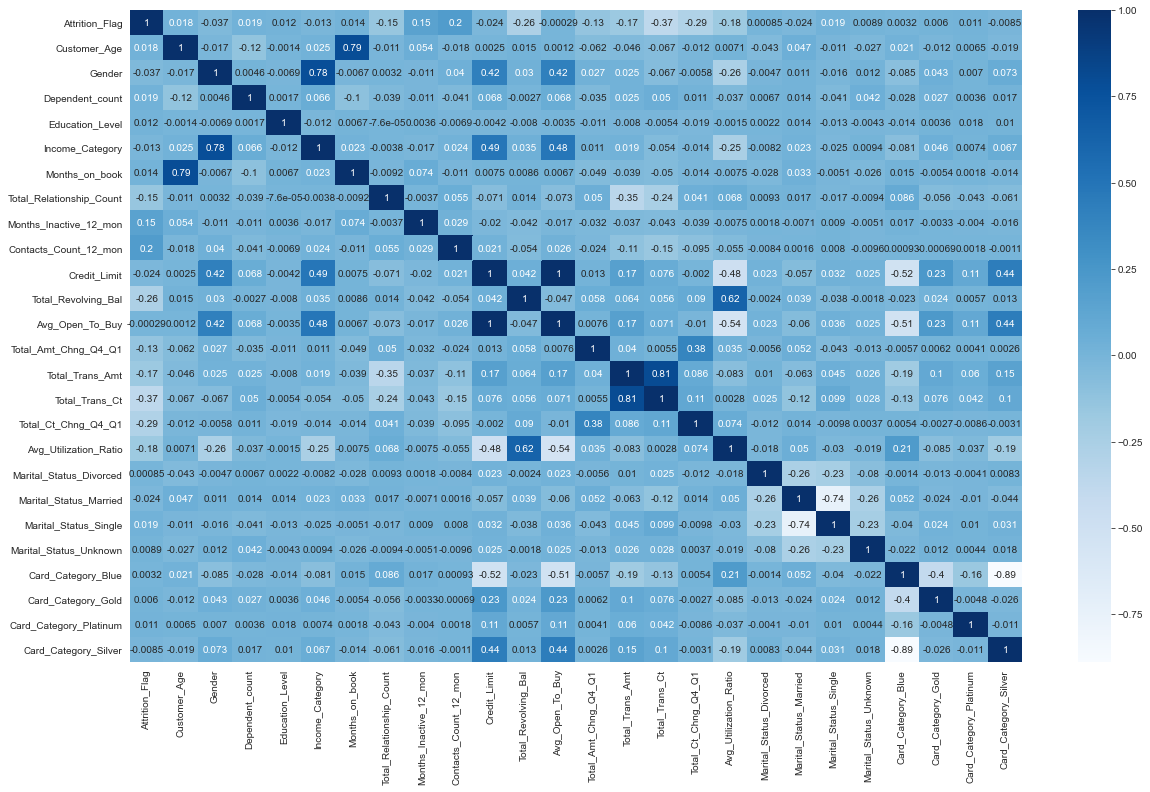

In [24]:
#Plotting the correlation
plt.figure(figsize=(20,12))
plt.rcParams.update({'font.size': 10})
sns.heatmap(data.corr(), annot=True, cmap='Blues')

As the dataset has many features to prediction the churn, maybe it has a chance of some of then are dependents of each other. In other words, they have almost the same impact on the target label. So, to make our project more reliable and less complex, the one the correlated feature can be removed from the model.

Using the correlation matrix, it is possible to see the which feature are dependent. It will also reduce the chance of overfitting the model.

Correlated features:
- Income_Category and Gender
- Months_on_book and Customer_Age
- Credit_Limit and Gender
- Credit_Limit and Income_Category
- Credit_Limit and Card_Category
- Avg_Open_To_Buy and Gender
- Avg_Open_To_Buy and Income_Category
- Avg_Open_To_Buy and Card_Category
- Avg_Open_To_Buy and Credit_Limit
- Avg_Utilization_Ratio and Credit_Limit
- Avg_Utilization_Ratio and Total_Revolving_Ball
- Avg_Utilization_Ratio and Avg_Open_To_Buy
- Total_Trans_Ct and Total_Trans_Amt
- Total_Ct_Chng_Q4_Q1 and Total_Amt_Chng_Q4_Q1

Eliminated features:
- Gender
- Customer_Age
- Income_Category
- Avg_Open_To_Buy
- Avg_Utilization_Ratio
- Total_Trans_Amt
- Total_Ct_Amnt_Q4_Q1

In [25]:
x = data.drop(['Gender','Customer_Age','Income_Category','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt','Total_Amt_Chng_Q4_Q1','Attrition_Flag'], axis = 1)
y = data['Attrition_Flag']

As shown above, all the dependent features were eliminated from the model

### 6.1 Feature Selection

Now the next part of the project is Feature Selection. Using some algorithms, it will be possible to determinate which feature has more relevance to solve the problem of this project. It will also help to reduce overfitting and make the solution faster.

In [26]:
#Selection the 5 best features using SelectKBest
selector = SelectKBest(f_classif, k=5)
x_feature_selected = selector.fit_transform(x, y)

#Get the 5 columns name of the selected feature
x.columns[selector.get_support(indices=True)]

Index(['Months_Inactive_12_mon', 'Contacts_Count_12_mon',
       'Total_Revolving_Bal', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'],
      dtype='object')

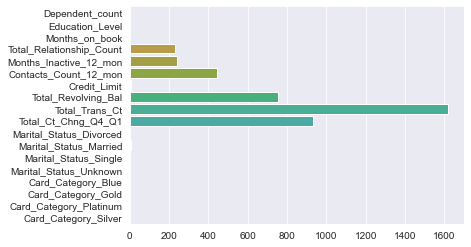

In [27]:
#Showing the score of all features
sns.barplot(y=x.columns, x = selector.scores_)

In [28]:
#Getting the best features using Random Forest
model = RandomForestClassifier()
model.fit(x,y)

RandomForestClassifier()

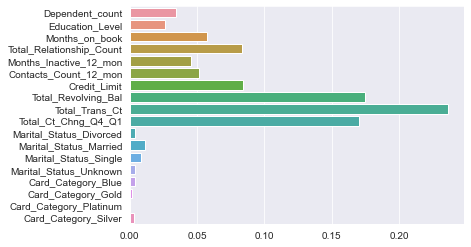

In [29]:
sns.barplot(y= x.columns, x = model.feature_importances_)

In [30]:
feat_select = pd.DataFrame({'Feature': x.columns ,'Importance': model.feature_importances_})
feat_select.sort_values(by = 'Importance', ascending = False)

Feature  Importance
8             Total_Trans_Ct    0.236404
7        Total_Revolving_Bal    0.174639
9        Total_Ct_Chng_Q4_Q1    0.169805
6               Credit_Limit    0.083772
3   Total_Relationship_Count    0.083164
2             Months_on_book    0.057114
5      Contacts_Count_12_mon    0.051173
4     Months_Inactive_12_mon    0.045368
0            Dependent_count    0.034261
1            Education_Level    0.026085
11    Marital_Status_Married    0.011520
12     Marital_Status_Single    0.008645
13    Marital_Status_Unknown    0.004339
10   Marital_Status_Divorced    0.004285
14        Card_Category_Blue    0.003721
17      Card_Category_Silver    0.003316
15        Card_Category_Gold    0.001905
16    Card_Category_Platinum    0.000484

In [31]:
#Getting the best features using Recursive Feature Elimination
selector = RFE(model, n_features_to_select=5)
x_feature_selected = selector.fit_transform(x, y)

#Get the 5 columns name of the selected feature
x.columns[selector.get_support(indices=True)]

Index(['Total_Relationship_Count', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'],
      dtype='object')

By the results of these different methods, the chosen features are:
- Total_Trans_Ct
- Total_Revolving_Bal
- Total_Ct_Chng_Q4_Q1
- Total_Relationship_Count
- Credit_Limit

## 7. Presets of the model

In this section it will setted some parameters that it will be used by the machine learning algorithms. Here it be declared your X variables and Y variables. It was also developed a function that splits the featuring to train and test variables to be used by the models and measure the algorithm performance by using some metrics.


In [65]:
#Setting the features selected in X variable
x_new = data[['Total_Trans_Ct','Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1','Total_Relationship_Count','Credit_Limit']]
x_new

Total_Trans_Ct  Total_Revolving_Bal  Total_Ct_Chng_Q4_Q1  \
0                  42                  777                1.625   
1                  33                  864                3.714   
2                  20                    0                2.333   
3                  20                 2517                2.333   
4                  28                    0                2.500   
...               ...                  ...                  ...   
10122             117                 1851                0.857   
10123              69                 2186                0.683   
10124              60                    0                0.818   
10125              62                    0                0.722   
10126              61                 1961                0.649   

       Total_Relationship_Count  Credit_Limit  
0                             5       12691.0  
1                             6        8256.0  
2                             4        3418.0  
3                             3        3313.0  
4                             5        4716.0  
...                         ...           ...  
10122                         3        4003.0  
10123                         4        4277.0  
10124                         5        5409.0  
10125                         4        5281.0  
10126                         6       10388.0  

[10127 rows x 5 columns]

In [66]:
#Setting the y target
y = data['Attrition_Flag']
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

In [67]:
#List to get the score of the models
results = []

In [68]:
def classify(model,x,y,name):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =66)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = np.mean(cross_val_score(model, x, y, cv = 10, scoring = 'roc_auc'))
    results.append([name,score])

The chosen metric to avaliate the model performance it will be ROC AUC because it was removed all the dependents features and  the dataset is imbalanced so, it's not possible to use accuracy.

## 8. Machine Learning  Models

In this section will be defined all the algorithms that it will be used and it will be tested them all. It will also be analyzed the performance of each one using some metrics, so it will find the best model to this project.


In [69]:
model = LogisticRegression()
classify(model,x_new,y,'Logistic Regression')

model = DecisionTreeClassifier()
classify(model,x_new,y,"Decision Tree")

model = RandomForestClassifier()
classify(model,x_new,y,"Random Forest")

model = GradientBoostingClassifier()
classify(model,x_new,y,'Gradient Boost')

model = AdaBoostClassifier()
classify(model,x_new,y,'Ada Boost')

model = XGBClassifier()
classify(model,x_new,y,'XGBoost')

model = SVC()
classify(model,x_new,y,'SVM')

model = KNeighborsClassifier()
classify(model,x_new,y,'KNN')

model = GaussianNB()
classify(model,x_new,y,'Naive Bayes')

model = MLPClassifier()
classify(model,x_new,y,'Neural Network')


[20:41:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:41:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [70]:
result = pd.DataFrame(results)
result.columns = ['Models','AUC']
result.sort_values(by='AUC', ascending = False)

Models       AUC
3       Gradient Boost  0.945271
8          Naive Bayes  0.941128
5              XGBoost  0.937813
4            Ada Boost  0.933456
2        Random Forest  0.927604
0  Logistic Regression  0.889890
6                  SVM  0.861697
7                  KNN  0.791789
1        Decision Tree  0.778204
9       Neural Network  0.713576

The Machine Learning algorithm that had the best results according to the dataframe shown above is Gradient Boost. This model had ROC AUC metric of 0.945 and this value represents a very good prediction made.

OBS: The Highest value of ROC AUC metric is 1.


## 9. Conclusions

Customer churn is very important factor that all companies need to pay attention if they would like to get better results in the future. Prediction of churn is growing nowadays due to its importance on business.

The goal of this project was to analyze the churn clients of a bank and try to understand why they quit the bank services/products and after step make a model to predict possible churn clients. In the development of this project all this goal were achieved, so the project was successful.

It was possible to see that the features that most influences in the churn decision of a client are:
- Credit limit lower than 5K.
- Around 40 transactions a year.
- Total revolving balance on credit card lower than 150.
- Change in Transaction Amount (Q4 over Q1) around 0.5
- Around 2 or 3 products held by the customer.

All the other features have their influence on the decision of churn, but this 5 listed above are the most relavant observed by the analyses and the algorithms.

The prediction model made is very reliable, the results of the metrics can prove this, and it can be used in futures prediction according with the necessity of the company.